# Real-world Data Science: Applications of Visualization
## Qinyu Chen

In [174]:
# setting

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='crowwwww56', api_key='YNELI27nGE9bz8ZSFaxZ')
import plotly.plotly as py
import plotly.graph_objs as go

import nltk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

## 1 Exploratory Data Analysis

In [141]:
data = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")

In [117]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [119]:
data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [120]:
# visualization 1: scatter plot

trace = go.Scatter(
    x = data['price'],
    y = data['points'],
    mode = 'markers'
)

data_v1 = [trace]

layout = dict(title = 'relationship between wine price and points',
              xaxis = dict(title = 'price'),
              yaxis = dict(title = 'points'),
              )
fig_scatter = dict(data=data_v1, layout=layout)
py.iplot(fig_scatter, filename='scatter_plot')

The draw time for this plot will be slow for all clients.


The first visualization is a scatter plot. I use point mark and position channel to encode wine points and wine price. I also add an interaction that when a user hovers on a certain point, its accurate wine points and wine price number will show up. The interaction is helpful when a user wants to know the detailed number of each point. This visualization addressed the task of examining the relationship between wine points and wine price. As we can see from the plot, there is a slight logarithm relationship between wine points and wine price.

In [134]:
# visualization 2: choropleth map

counts = data['country'].value_counts()

trace = go.Choropleth(
    locationmode = 'country names',
    locations = country_counts.index.values,
    colorscale = [[0,"rgb(226, 183, 200)"],[0.5,"rgb(153, 65, 100)"],[1,"rgb(147, 19, 70)"]],
    text = country_counts.index,
    z = country_counts.values
)

data_v2 = [trace]

layout = dict(title = 'where the wine reviews were made from')
fig_map = dict(data=data_v2, layout=layout)
py.iplot(fig_map, filename='map')

The second visualization is a choropleth map. I use area mark to and position channel to encode geo-location. The color channel is used to encode review number. I also add an interaction that when a user hovers on a certain area, the country name and corresponding review number will appear which helps users to know detailed information about what is the country and what is the number of wine reviews. This visualization addressed the task of examing where most of the wine reviews were made from. As we can see from the plot, most of the wine reviews were made from the United States.

## 2 Data Preprocessing

In [142]:
# drop columns, duplicates, na

# 'Unnamed: 0' is not related 
# 'designation', 'region_2,taster_twitter_handle' containing too many nan
# use 'description' instead of 'title'
data = data.drop(columns = ['Unnamed: 0','region_2','designation','taster_twitter_handle','title'])

data = data.drop_duplicates()
data = data.dropna()

data = data.reset_index(drop=True)

In [143]:
data.head()

,country,description,points,price,province,region_1,taster_name,variety,winery
0,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
1,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,Riesling,St. Julian
2,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks
3,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Tempranillo-Merlot,Tandem
4,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Frappato,Terre di Giurfo


In [144]:
# choosing random subset of the dataset

data = data.sample(n=10000)
data = data.reset_index(drop=True)

In [145]:
data.shape

(10000, 9)

In [146]:
data.head()

,country,description,points,price,province,region_1,taster_name,variety,winery
0,US,Richer scents of maple smoke and bacon fat int...,92,55.0,California,Santa Cruz Mountains,Matt Kettmann,Syrah,Big Basin
1,Spain,"Smoky, charred aromas are rugged and center ar...",89,15.0,Catalonia,Montsant,Michael Schachner,Red Blend,Bula
2,US,"This blend of Roussanne, Viognier, Marsanne an...",86,24.0,California,Santa Clara Valley,Matt Kettmann,Rhône-style White Blend,Sarah's Vineyard
3,US,"A bit reduced when first opened, it throws off...",89,60.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Panther Creek
4,US,"Always in the top rank of Oregon Chardonnays, ...",93,85.0,Oregon,Willamette Valley,Paul Gregutt,Chardonnay,Bergström


In [147]:
data.dtypes

country         object
description     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
variety         object
winery          object
dtype: object

In [148]:
# one-hot encoding for categorical columns 

data = pd.get_dummies(data, columns = ["country","province","region_1","taster_name","variety","winery"])
data.shape

(10000, 6153)

In [149]:
# clean text data by removing stop words, stemming

stopwords = []
with open('stopwords_english.txt') as fsw:
    for word in fsw.readlines():
        word = word.strip('\n')
        stopwords.append(word)
fsw.close()

def preprocess_text(text):
    text = text.apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    text = text.apply(lambda x: " ".join(x.strip() for x in str(x).split()))
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    text = text.str.replace('[^\w\s]', '')
    text = text.str.replace('\d+', '')
    text = text.apply(lambda x: " ".join([word for word in str(x).split() if word not in (stopwords)]))
    text = text.astype(str)
    return text
data['description'] = preprocess_text(data['description'])

ps = nltk.stem.PorterStemmer()
def stem(text):
    text = text.apply(lambda x: " ".join([ps.stem(x) for x in str(x).split()]))
    return text
data['description'] = stem(data['description'])

In [150]:
data['description'].head()

0    richer scent mapl smoke bacon fat integr well ...
1    smoki char aroma rug center around black fruit...
2    blend roussann viognier marsann grenach blanc ...
3    bit reduc first open throw scent burnt rubber ...
4    alway top rank oregon chardonnay sigrid expres...
Name: description, dtype: object

In [151]:
# split dataset into train set and test set

train, test = train_test_split(data,test_size=0.2,random_state=0)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [152]:
train.shape, test.shape

((8000, 6153), (2000, 6153))

In [153]:
# normalize quantitative columns

scaler = StandardScaler()

train[['price','points']] = scaler.fit_transform(train[['price','points']])
test[['price','points']] = scaler.transform(test[['price','points']])

In [154]:
# get X_train, X_test, y_train, y_test

X_train = train.drop(['points'],axis=1)
X_test = test.drop(['points'],axis=1)
y_train = train['points']
y_test = test['points']

In [155]:
train.shape, test.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 6153), (2000, 6153), (8000, 6152), (2000, 6152), (8000,), (2000,))

In [156]:
# TF-IDF
vectorizer = TfidfVectorizer(sublinear_tf = True)
train_text = vectorizer.fit_transform(X_train.description)
test_text = vectorizer.transform(X_test.description)

In [157]:
# LDA
lda = LatentDirichletAllocation(n_components=10)
train_text = lda.fit_transform(train_text)
test_text = lda.transform(test_text) 

In [158]:
train_text,test_text

(array([[0.01346341, 0.01346045, 0.01346045, ..., 0.01346066, 0.69901897,
         0.19327194],
        [0.01948744, 0.01948392, 0.01948391, ..., 0.01948411, 0.1285686 ,
         0.71554911],
        [0.01640964, 0.01640251, 0.01640291, ..., 0.01640476, 0.28678448,
         0.01640734],
        ...,
        [0.01922967, 0.01922709, 0.01922708, ..., 0.01922713, 0.01923028,
         0.69902401],
        [0.01858144, 0.01857597, 0.01857609, ..., 0.01857708, 0.01858217,
         0.01858128],
        [0.01694701, 0.01693673, 0.01693668, ..., 0.01693759, 0.01694288,
         0.8474866 ]]),
 array([[0.01766421, 0.01765906, 0.01765906, ..., 0.01766062, 0.55001513,
         0.01766404],
        [0.26977744, 0.01526353, 0.01526356, ..., 0.01527003, 0.18518579,
         0.01526698],
        [0.71879608, 0.01565238, 0.01565239, ..., 0.01565292, 0.07484346,
         0.01565797],
        ...,
        [0.01767736, 0.01766532, 0.01768203, ..., 0.0176654 , 0.26980292,
         0.4072169 ],
        [0.0

In [159]:
# get preprocessed X_train, X_test, y_train, y_test

# drop 'description' from X_train, X_test
X_train_preprocessed = X_train.drop(['description'],axis=1)
X_test_preprocessed = X_test.drop(['description'],axis=1)

In [160]:
# convert lda result array into dataframe
train_lda = pd.DataFrame(train_text)
test_lda = pd.DataFrame(test_text)

In [161]:
# concat lda df and X_train_preprocessed
X_train_preprocessed2 = pd.concat([train_lda,X_train_preprocessed],axis = 1)
X_test_preprocessed2 = pd.concat([test_lda,X_test_preprocessed],axis = 1)

In [162]:
X_train_preprocessed.shape,train_lda.shape,X_train_preprocessed2.shape

((8000, 6151), (8000, 10), (8000, 6161))

In [163]:
# get values
X_train_preprocessed3 = X_train_preprocessed2.values
X_test_preprocessed3 = X_test_preprocessed2.values

In [164]:
# X_train_preprocessed3, X_test_preprocessed3, y_train, y_test
# X_train_preprocessed2, X_test_preprocessed2 containing feature name

I did these following steps to preprocessed the data:  
1) Drop 'Unnamed: 0' column since it is not related to points, drop 'designation', 'region_2', 'taster_twitter_handle' since they contain too many nan values, drop 'title' column since I will only use 'description' column.    
2) I did one-hot encoding for categorical columns including 'country', 'province', 'region_1', 'taster_name', 'variety', 'winery' to transfer them into numeric features.  
3) I cleaned text data by removing stop words and non-English words, then did stemming on words aiming at increasing model accuracy.  
4) I split the dataset into the training set and testing set.  
5) I standardized the quantitative columns separately on the training set and testing set to avoid data leakage.  
6) I did TF-IDF and LDA separately on the training set and testing set to transfer text feature into numeric features.  
7) I concatenate data frames to get the final X_train, X_test, y_train, and y_test.  

## 3 Model Hyperparameters

I chose to use Ridge Regression, Lasso Regression and Gradient Boosting Regression Tree algorithms to predict wine points.  
For Ridge Regression, 

In [165]:
# Ridge Regression

mse = make_scorer(mean_squared_error)

grid = GridSearchCV(estimator = Ridge(), param_grid = {'alpha':[0.01,0.05,0.1,1.0,5.0]}, scoring =mse, cv = 10, return_train_score=True).fit(X_train_preprocessed3, y_train)
result = pd.DataFrame(grid.cv_results_)
result.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,10.733806,0.973171,0.012265,0.003188,0.01,{'alpha': 0.01},0.787262,0.761715,0.815979,0.806497,...,0.144683,0.141078,0.142389,0.144250,0.143516,0.143877,0.144322,0.145325,0.144052,0.001366
1,10.157740,0.512551,0.010868,0.000536,0.05,{'alpha': 0.05},0.719892,0.701474,0.745088,0.752042,...,0.146774,0.143038,0.144392,0.146281,0.145621,0.145799,0.146450,0.147162,0.146056,0.001359
2,10.784624,1.069327,0.011869,0.002017,0.1,{'alpha': 0.1},0.687170,0.668122,0.708644,0.725515,...,0.150096,0.146265,0.147619,0.149513,0.148804,0.148982,0.149861,0.150306,0.149300,0.001371
3,11.166955,1.357433,0.011768,0.001601,1,{'alpha': 1.0},0.599629,0.568113,0.605999,0.628120,...,0.228359,0.224719,0.225501,0.227226,0.225506,0.226523,0.229464,0.229220,0.227406,0.001664
4,11.229806,0.756335,0.012467,0.001561,5,{'alpha': 5.0},0.600969,0.567533,0.600193,0.615376,...,0.399479,0.397520,0.395634,0.398731,0.395789,0.397423,0.403685,0.404113,0.399296,0.002844


In [167]:
result_filtered2 = result[["split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score","split5_test_score","split6_test_score","split7_test_score","split8_test_score","split9_test_score"]]
result_filtered3_ridge = np.transpose(result_filtered2)
result_filtered3_ridge.columns = ['0.01','0.05','0.1','1','5']
result_filtered3_ridge

,0.01,0.05,0.1,1,5
split0_test_score,0.787262,0.719892,0.687170,0.599629,0.600969
split1_test_score,0.761715,0.701474,0.668122,0.568113,0.567533
split2_test_score,0.815979,0.745088,0.708644,0.605999,0.600193
split3_test_score,0.806497,0.752042,0.725515,0.628120,0.615376
split4_test_score,0.852745,0.795485,0.763671,0.655276,0.657021
split5_test_score,0.789013,0.735550,0.705352,0.606789,0.610207
split6_test_score,0.773944,0.716979,0.694075,0.627100,0.637492
split7_test_score,0.755212,0.714371,0.692704,0.619727,0.624472
split8_test_score,0.750177,0.684217,0.650797,0.543006,0.531306
split9_test_score,0.692356,0.647999,0.624029,0.533016,0.519839


Text(0.5, 0, 'alpha')

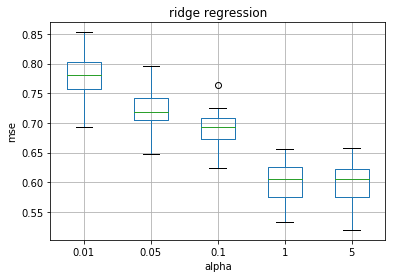

In [168]:
result_filtered3_ridge.boxplot()
plt.title("ridge regression")
plt.ylabel("mse")
plt.xlabel("alpha")

Text(0.5, 0, 'alpha')

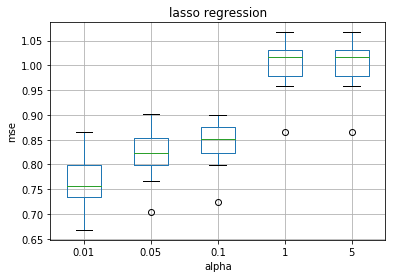

In [169]:
# Lasso Regression

mse = make_scorer(mean_squared_error)

grid = GridSearchCV(estimator = Lasso(), param_grid = {'alpha':[0.01,0.05,0.1,1.0,5.0]}, scoring =mse, cv = 10, return_train_score=True).fit(X_train_preprocessed3, y_train)
result = pd.DataFrame(grid.cv_results_)

result_filtered2 = result[["split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score","split5_test_score","split6_test_score","split7_test_score","split8_test_score","split9_test_score"]]
result_filtered3_lasso = np.transpose(result_filtered2)
result_filtered3_lasso.columns = ['0.01','0.05','0.1','1','5']

result_filtered3_lasso.boxplot()
plt.title("lasso regression")
plt.ylabel("mse")
plt.xlabel("alpha")

In [171]:
# Gardient Boosting Regression

mse = make_scorer(mean_squared_error)

grid = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = {'learning_rate':[0.01,0.1,0.5],'n_estimators':[25,50,100],'subsample':[0.6,0.8,1.0]}, scoring =mse, cv = 10, return_train_score=True).fit(X_train_preprocessed3, y_train)
result = pd.DataFrame(grid.cv_results_)
result.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,35.026700,0.260215,0.020645,0.001842,0.01,25,0.6,"{'learning_rate': 0.01, 'n_estimators': 25, 's...",0.793623,0.835415,...,0.829317,0.825115,0.828734,0.827507,0.828922,0.828876,0.833301,0.841282,0.830884,0.004457
1,48.980678,0.179243,0.021446,0.003313,0.01,25,0.8,"{'learning_rate': 0.01, 'n_estimators': 25, 's...",0.792276,0.834645,...,0.830259,0.826020,0.829009,0.827749,0.829333,0.829420,0.833678,0.842273,0.831280,0.004438
2,63.139601,0.174975,0.020246,0.002188,0.01,25,1,"{'learning_rate': 0.01, 'n_estimators': 25, 's...",0.793491,0.836605,...,0.830612,0.825974,0.829575,0.828113,0.830659,0.830416,0.834267,0.842854,0.831923,0.004495
3,65.704232,0.366242,0.021243,0.002603,0.01,50,0.6,"{'learning_rate': 0.01, 'n_estimators': 50, 's...",0.686398,0.729281,...,0.720222,0.716070,0.718915,0.718778,0.718094,0.719638,0.723139,0.728912,0.720774,0.003519
4,93.308612,0.591235,0.022440,0.003995,0.01,50,0.8,"{'learning_rate': 0.01, 'n_estimators': 50, 's...",0.687524,0.729157,...,0.720687,0.716899,0.720208,0.719302,0.719525,0.719583,0.723224,0.729401,0.721479,0.003415
5,122.811179,2.825839,0.023441,0.005317,0.01,50,1,"{'learning_rate': 0.01, 'n_estimators': 50, 's...",0.688819,0.731255,...,0.721694,0.718104,0.720822,0.719624,0.721509,0.721375,0.724293,0.730703,0.722574,0.003392
6,127.176602,0.657280,0.023234,0.002898,0.01,100,0.6,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.568273,0.609148,...,0.595492,0.593178,0.594913,0.593920,0.593249,0.594110,0.597505,0.600256,0.595599,0.002331
7,183.508827,2.019694,0.024136,0.002884,0.01,100,0.8,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.570881,0.610511,...,0.596368,0.593787,0.595958,0.595801,0.595098,0.595304,0.598921,0.601620,0.596822,0.002392
8,244.027693,4.153268,0.025036,0.004423,0.01,100,1,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.573845,0.614277,...,0.598717,0.595456,0.597651,0.596914,0.597264,0.597888,0.600343,0.603150,0.598728,0.002334
9,36.743908,0.310640,0.021844,0.000709,0.1,25,0.6,"{'learning_rate': 0.1, 'n_estimators': 25, 'su...",0.471503,0.503909,...,0.475232,0.475141,0.475220,0.473677,0.473581,0.473298,0.476865,0.476409,0.475355,0.001777


In [175]:
result_filtered2 = result[["split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score","split5_test_score","split6_test_score","split7_test_score","split8_test_score","split9_test_score"]]
result_filtered3_gb = np.transpose(result_filtered2)
result_filtered3_gb.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']
result_filtered3_gb

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
split0_test_score,0.793623,0.792276,0.793491,0.686398,0.687524,0.688819,0.568273,0.570881,0.573845,0.471503,0.466046,0.471722,0.439986,0.439179,0.440732,0.424906,0.428418,0.428827,0.464373,0.458582,0.447771,0.473403,0.446506,0.441341,0.470542,0.446906,0.440102
split1_test_score,0.835415,0.834645,0.836605,0.729281,0.729157,0.731255,0.609148,0.610511,0.614277,0.503909,0.506826,0.507161,0.476449,0.477934,0.477874,0.454803,0.462285,0.458377,0.478686,0.476451,0.479785,0.485087,0.465813,0.473234,0.471541,0.453353,0.467965
split2_test_score,0.847920,0.848725,0.850004,0.740950,0.742185,0.743636,0.615579,0.617340,0.619723,0.492954,0.500463,0.504648,0.459951,0.464143,0.468436,0.446613,0.447050,0.456178,0.473885,0.452756,0.459381,0.478022,0.469962,0.455245,0.472078,0.456359,0.454313
split3_test_score,0.896416,0.897813,0.897684,0.784217,0.785097,0.785578,0.650875,0.651913,0.654454,0.520262,0.518280,0.516913,0.476676,0.474561,0.473313,0.449875,0.449792,0.453847,0.472001,0.454928,0.466389,0.459726,0.469316,0.455810,0.448189,0.452387,0.462176
split4_test_score,0.859655,0.859753,0.860523,0.744700,0.746512,0.748515,0.616295,0.618751,0.621876,0.493690,0.494692,0.501770,0.456920,0.460959,0.464720,0.435578,0.439475,0.445416,0.453857,0.459239,0.460773,0.447096,0.453004,0.454524,0.462799,0.448486,0.449464
split5_test_score,0.872369,0.873130,0.872942,0.755264,0.756830,0.758541,0.626036,0.627068,0.631284,0.503152,0.504979,0.511015,0.469860,0.470529,0.475059,0.453268,0.454408,0.457971,0.476461,0.465811,0.451288,0.480777,0.465493,0.447482,0.470592,0.478574,0.442454
split6_test_score,0.852670,0.853809,0.854786,0.743823,0.744769,0.749193,0.621840,0.625806,0.631811,0.510018,0.516876,0.518977,0.479168,0.476716,0.486852,0.458387,0.454086,0.468980,0.472478,0.478436,0.476011,0.478438,0.479554,0.473880,0.467711,0.478800,0.467006
split7_test_score,0.859224,0.859678,0.860192,0.752846,0.754083,0.755434,0.630985,0.634607,0.636000,0.515324,0.518299,0.518706,0.477123,0.483702,0.482636,0.459560,0.467198,0.466510,0.485331,0.488447,0.461441,0.481021,0.457857,0.461614,0.478045,0.472765,0.460446
split8_test_score,0.811521,0.812362,0.813067,0.709048,0.708505,0.711169,0.588915,0.592824,0.595574,0.482824,0.479048,0.488607,0.447666,0.452520,0.448457,0.424557,0.426213,0.433451,0.442001,0.439983,0.445243,0.461619,0.441126,0.440186,0.440419,0.461486,0.433539
split9_test_score,0.722943,0.723347,0.724227,0.632479,0.633188,0.635479,0.536907,0.540086,0.542894,0.459660,0.467791,0.465871,0.436844,0.439758,0.441451,0.420650,0.418003,0.424664,0.437044,0.426602,0.444882,0.437770,0.431228,0.429673,0.426837,0.427483,0.425432


In [176]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,35.026700,0.260215,0.020645,0.001842,0.01,25,0.6,"{'learning_rate': 0.01, 'n_estimators': 25, 's...",0.793623,0.835415,0.847920,0.896416,0.859655,0.872369,0.852670,0.859224,0.811521,0.722943,0.835176,0.046543,3,0.835802,0.829987,0.829317,0.825115,0.828734,0.827507,0.828922,0.828876,0.833301,0.841282,0.830884,0.004457
1,48.980678,0.179243,0.021446,0.003313,0.01,25,0.8,"{'learning_rate': 0.01, 'n_estimators': 25, 's...",0.792276,0.834645,0.848725,0.897813,0.859753,0.873130,0.853809,0.859678,0.812362,0.723347,0.835554,0.046866,2,0.835145,0.829911,0.830259,0.826020,0.829009,0.827749,0.829333,0.829420,0.833678,0.842273,0.831280,0.004438
2,63.139601,0.174975,0.020246,0.002188,0.01,25,1,"{'learning_rate': 0.01, 'n_estimators': 25, 's...",0.793491,0.836605,0.850004,0.897684,0.860523,0.872942,0.854786,0.860192,0.813067,0.724227,0.836352,0.046616,1,0.835808,0.830953,0.830612,0.825974,0.829575,0.828113,0.830659,0.830416,0.834267,0.842854,0.831923,0.004495
3,65.704232,0.366242,0.021243,0.002603,0.01,50,0.6,"{'learning_rate': 0.01, 'n_estimators': 50, 's...",0.686398,0.729281,0.740950,0.784217,0.744700,0.755264,0.743823,0.752846,0.709048,0.632479,0.727901,0.040539,6,0.724301,0.719675,0.720222,0.716070,0.718915,0.718778,0.718094,0.719638,0.723139,0.728912,0.720774,0.003519
4,93.308612,0.591235,0.022440,0.003995,0.01,50,0.8,"{'learning_rate': 0.01, 'n_estimators': 50, 's...",0.687524,0.729157,0.742185,0.785097,0.746512,0.756830,0.744769,0.754083,0.708505,0.633188,0.728785,0.040743,5,0.725322,0.720638,0.720687,0.716899,0.720208,0.719302,0.719525,0.719583,0.723224,0.729401,0.721479,0.003415
5,122.811179,2.825839,0.023441,0.005317,0.01,50,1,"{'learning_rate': 0.01, 'n_estimators': 50, 's...",0.688819,0.731255,0.743636,0.785578,0.748515,0.758541,0.749193,0.755434,0.711169,0.635479,0.730762,0.040532,4,0.725792,0.721824,0.721694,0.718104,0.720822,0.719624,0.721509,0.721375,0.724293,0.730703,0.722574,0.003392
6,127.176602,0.657280,0.023234,0.002898,0.01,100,0.6,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.568273,0.609148,0.615579,0.650875,0.616295,0.626036,0.621840,0.630985,0.588915,0.536907,0.606485,0.031599,9,0.598896,0.594475,0.595492,0.593178,0.594913,0.593920,0.593249,0.594110,0.597505,0.600256,0.595599,0.002331
7,183.508827,2.019694,0.024136,0.002884,0.01,100,0.8,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.570881,0.610511,0.617340,0.651913,0.618751,0.627068,0.625806,0.634607,0.592824,0.540086,0.608979,0.031204,8,0.600118,0.595250,0.596368,0.593787,0.595958,0.595801,0.595098,0.595304,0.598921,0.601620,0.596822,0.002392
8,244.027693,4.153268,0.025036,0.004423,0.01,100,1,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.573845,0.614277,0.619723,0.654454,0.621876,0.631284,0.631811,0.636000,0.595574,0.542894,0.612174,0.031314,7,0.602331,0.597571,0.598717,0.595456,0.597651,0.596914,0.597264,0.597888,0.600343,0.603150,0.598728,0.002334
9,36.743908,0.310640,0.021844,0.000709,0.1,25,0.6,"{'learning_rate': 0.1, 'n_estimators': 25, 'su...",0.471503,0.503909,0.492954,0.520262,0.493690,0.503152,0.510018,0.515324,0.482824,0.459660,0.495330,0.018376,12,0.479521,0.474608,0.475232,0.475141,0.475220,0.473677,0.473581,0.473298,0.476865,0.476409,0.475355,0.001777


Text(0.5, 0, 'index')

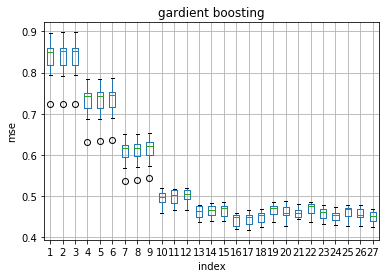

In [173]:
result_filtered3_gb.boxplot()
plt.title("gardient boosting")
plt.ylabel("mse")
plt.xlabel("index")

In [178]:
# visualization 3: box plot
# Comapring the 10CV performance of three regressor's optimal hyperparameters

# Ridge: param_alpha = 5.0
# Lasso: param_alpha = 0.01
# Gardient Boosting: param_learning_rate = 0.5, param_n_estimators = 100, param_subsample = 0.8

ridgecv = result_filtered3_ridge['5']
lassocv = result_filtered3_lasso['0.01']
gbcv = result_filtered3_gb['26']

v3 = pd.concat([ridgecv, lassocv,gbcv], axis=1, join='inner')
v3.columns = ['ridge','lasso','gb']
v3

,ridge,lasso,gb
split0_test_score,0.600969,0.752316,0.446906
split1_test_score,0.567533,0.744250,0.453353
split2_test_score,0.600193,0.730146,0.456359
split3_test_score,0.615376,0.784587,0.452387
split4_test_score,0.657021,0.864726,0.448486
split5_test_score,0.610207,0.827475,0.478574
split6_test_score,0.637492,0.804027,0.478800
split7_test_score,0.624472,0.760041,0.472765
split8_test_score,0.531306,0.687692,0.461486
split9_test_score,0.519839,0.667873,0.427483


Text(0.5, 0, 'regressor')

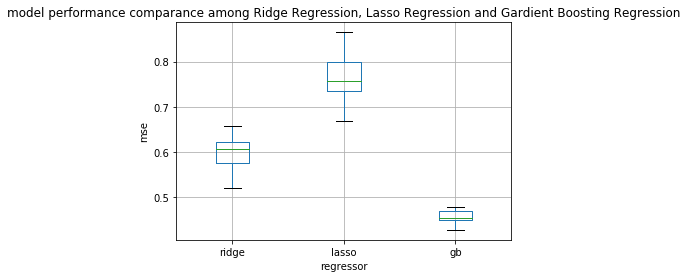

In [179]:
# visualization 3: box plot

v3.boxplot()
plt.title("model performance comparance among Ridge Regression, Lasso Regression and Gardient Boosting Regression")
plt.ylabel("mse")
plt.xlabel("regressor")

The thrid visualization is a box plot. 

## 4 Best Model on Testing Set

In [180]:
# Best model: gradient boosting regression with learning_rate = 0.5, n_estimators = 100, subsample = 0.8

best = GradientBoostingRegressor(learning_rate = 0.5, n_estimators = 100, subsample = 0.8)
best.fit(X_test_preprocessed3, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.8, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [181]:
feature_importance = pd.Series(best.feature_importances_, index = X_test_preprocessed2.columns)
top_10 = feature_importance.nlargest(10)
top_10

price    0.421124
1        0.069406
5        0.054944
0        0.023814
4        0.023604
7        0.020715
2        0.020245
9        0.013535
3        0.009372
8        0.009358
dtype: float64

Text(0.5, 0, 'feature name')

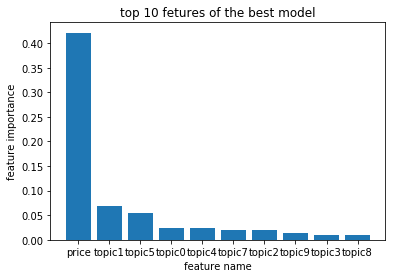

In [184]:
# visualization 4: Bar Plot

top_10_index = ["price","topic1","topic5","topic0","topic4","topic7","topic2","topic9","topic3","topic8"]
plt.bar(top_10_index,top_10.values)
plt.title("top 10 fetures of the best model")
plt.ylabel("feature importance")
plt.xlabel("feature name")

The forth visualization is a bar plot.